# Funds exploratory

We are going to perform an EDA on several mutual funds.

## Import libraries

In [1]:
library('reticulate')
source('../src/R/rfunds.R')

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load data

In [3]:
reload <- FALSE
if (reload){
    pyfunds <- import_from_path('pyfunds', path = "../src/")
    dt <- import("datetime", convert = FALSE)
    m<-pyfunds$MorningStar()
    funds<-read.table('fund_list.txt', na.strings="",stringsAsFactors=FALSE, skipNul = TRUE,header=FALSE)
    funds<-funds$V1
    df_values<-m$get_historical_data_ISIN_list(ISINs=funds, currency='EUR', start_date=dt$date(2009L, 1L, 1L))
    df_values$date<-as.POSIXct(rownames(df_values))
    saveRDS(df_values, file = "df_values.rds")
}else{
    df_values <- readRDS("df_values.rds")
}

All the funds start with an initial investment of 100:

In [4]:
head(df_values)

,IE0002639668,IE0007281425,IE0007292083,IE0007471695,IE0007472115,IE0007987690,IE0009591805,IE0031786142,IE0032620787,IE00B03HCZ61,⋯,IE00B5456744,IE00B04GQX83,IE0008248795,IE0031786696,LU1883867761,LU1861133657,LU0625742753,LU0625739619,LU0625739700,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2009-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,⋯,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01
2009-01-02,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-02
2009-01-03,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-03
2009-01-04,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-04
2009-01-05,104.72,101.47,101.48,100.81,100.06,105.26,100.12,108.50,104.73,104.68,⋯,NaN,101.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-05
2009-01-06,107.51,102.01,102.02,102.62,99.29,107.38,99.78,112.41,107.52,107.12,⋯,NaN,103.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-06


## Data Analysis

First we calculate the ROI over a sliding window of one year for all the funds

In [5]:
df_roi<-calc_roi(df_values, num_days=365)

We can calculate a summary of the bonds:
* **mean:** Aritmetic mean of all the ROI values calculated over a sliding window
* **geom:** Geometric mean of all the ROI values calculated over a sliding window
* **var:** Variance of all the ROI values calculated over a sliding window
* **mindate:** Starting date of the fund history
* **days_losses:** Maximum number of consecutive losses the fund has experienced

In [6]:
df_summary<-calc_summary(df_values, num_days=365)
head(df_summary)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
ES0110182039,1.0276148,1.0114882,0.0334738565,2009-01-01,408
ES0114105036,1.1813303,1.1750825,0.0150356278,2009-01-01,49
ES0148181003,1.0213112,1.0208589,0.0009076922,2019-04-05,27
ES0149051007,0.9857933,0.9748317,0.0218260619,2016-06-10,352
ES0158967036,1.0266974,1.0109134,0.0326901214,2009-01-01,408
IE0002639551,1.0858868,1.0782053,0.0167480127,2009-01-01,223


We can search for funds with high yield and low variance:

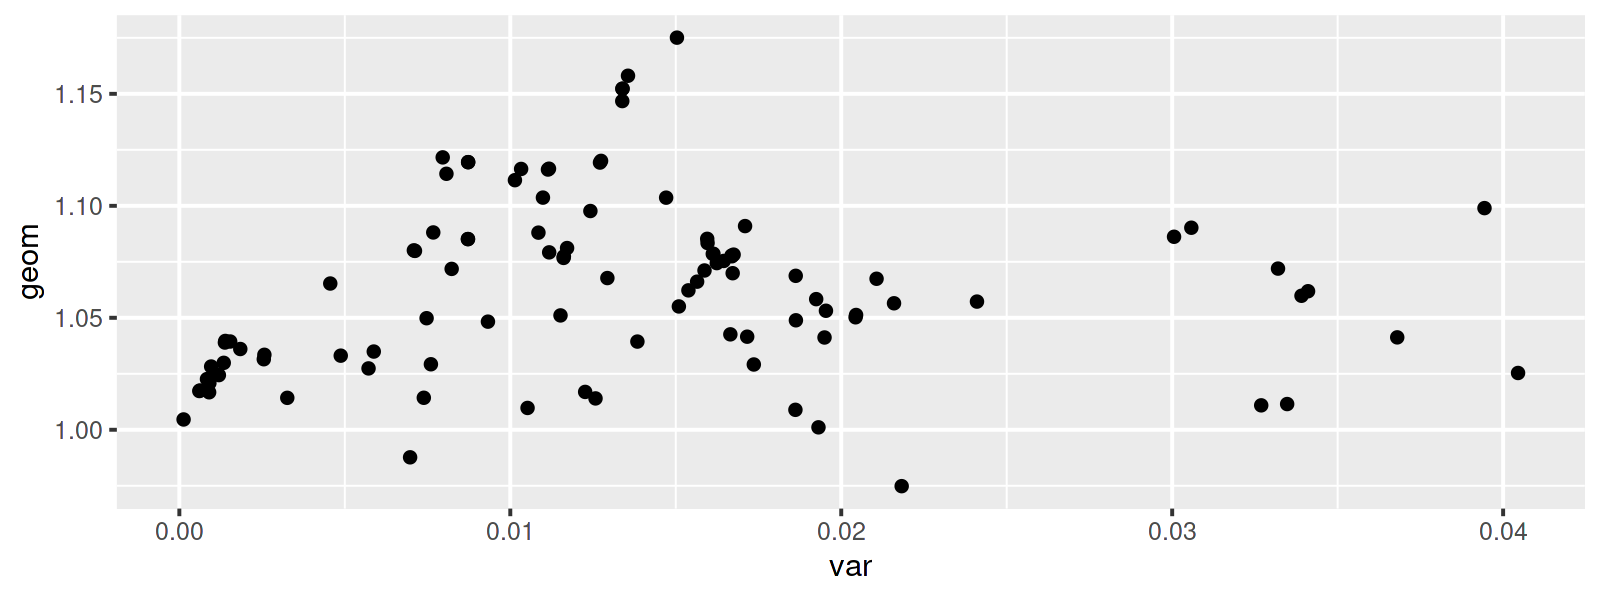

In [7]:
options(repr.plot.width=8,repr.plot.height=3,repr.plot.res = 200)

ggplot(df_summary,aes(x=var,y=geom))+geom_point()

Warning message:
“Removed 561 row(s) containing missing values (geom_path).”


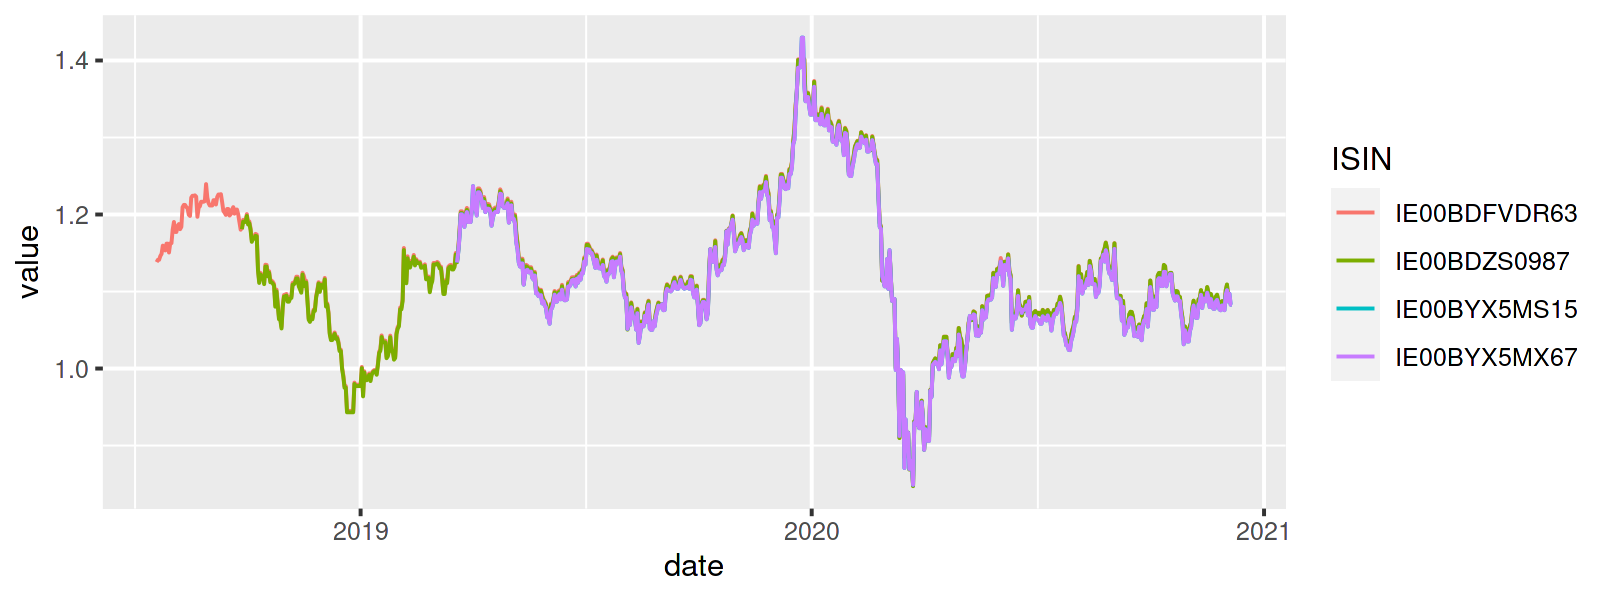

In [8]:
high_profit<-df_summary %>% filter(var<0.01) %>% filter(geom>1.1)
plot_funds(df_roi,funds=rownames(high_profit))

Warning message:
“Removed 5635 row(s) containing missing values (geom_path).”


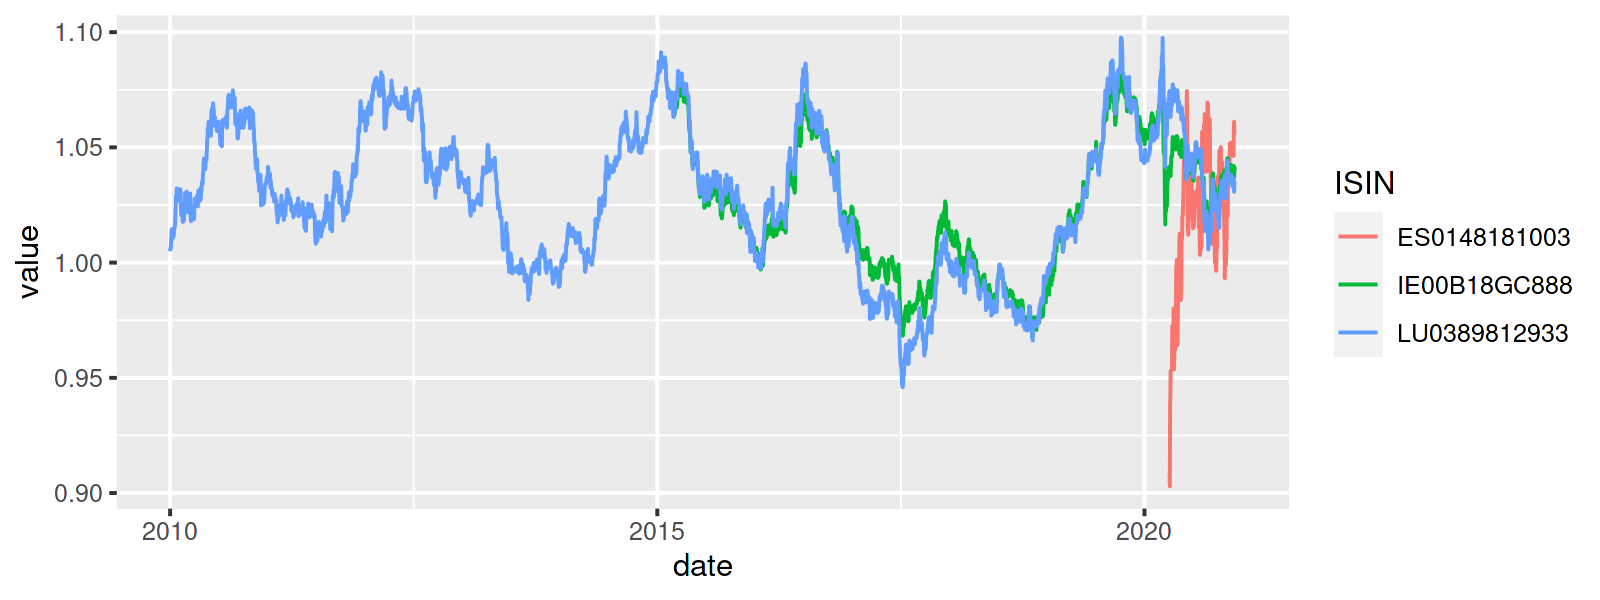

In [9]:
low_risk<-df_summary %>% filter(var<0.001) %>% filter(geom>1.02)
plot_funds(df_roi,funds=rownames(low_risk))

We can search for funds which have low perios ofs losses and high ROI:

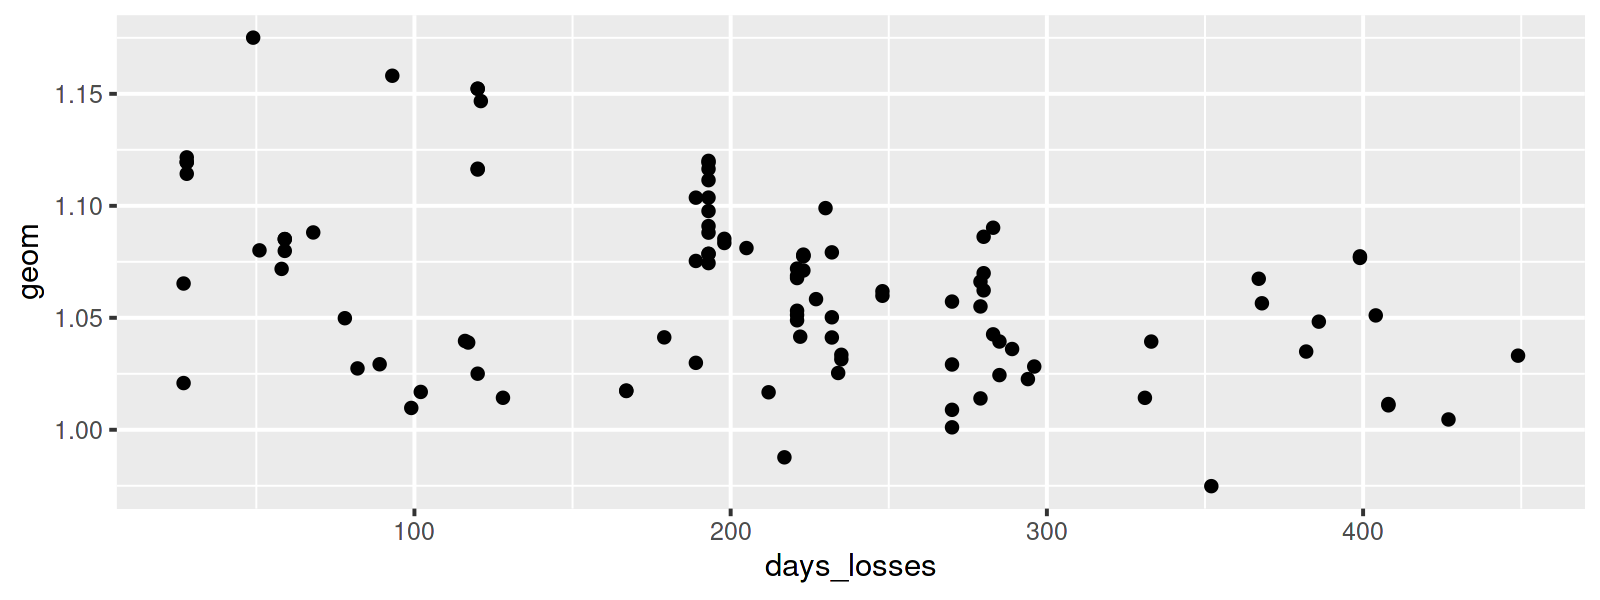

In [10]:
ggplot(df_summary,aes(x=days_losses,y=geom))+geom_point()

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
ES0114105036,1.181330,1.175083,0.015035628,2009-01-01,49
IE00B1W56J03,1.163760,1.158071,0.013556799,2009-01-01,93
IE00BD0NCM55,1.083341,1.080113,0.007086545,2017-05-11,51
IE00BD0NCN62,1.083118,1.079873,0.007119621,2017-05-11,59
IE00BDFVDR63,1.125121,1.121621,0.007957769,2017-07-20,28
IE00BDZS0987,1.117837,1.114297,0.008070481,2017-09-27,28
IE00BYX5MS15,1.123300,1.119488,0.008726859,2018-03-20,28
IE00BYX5MX67,1.123301,1.119489,0.008726453,2018-03-20,28
IE00BYX5N110,1.075696,1.071836,0.008228395,2018-03-20,58


Warning message:
“Removed 31921 row(s) containing missing values (geom_path).”


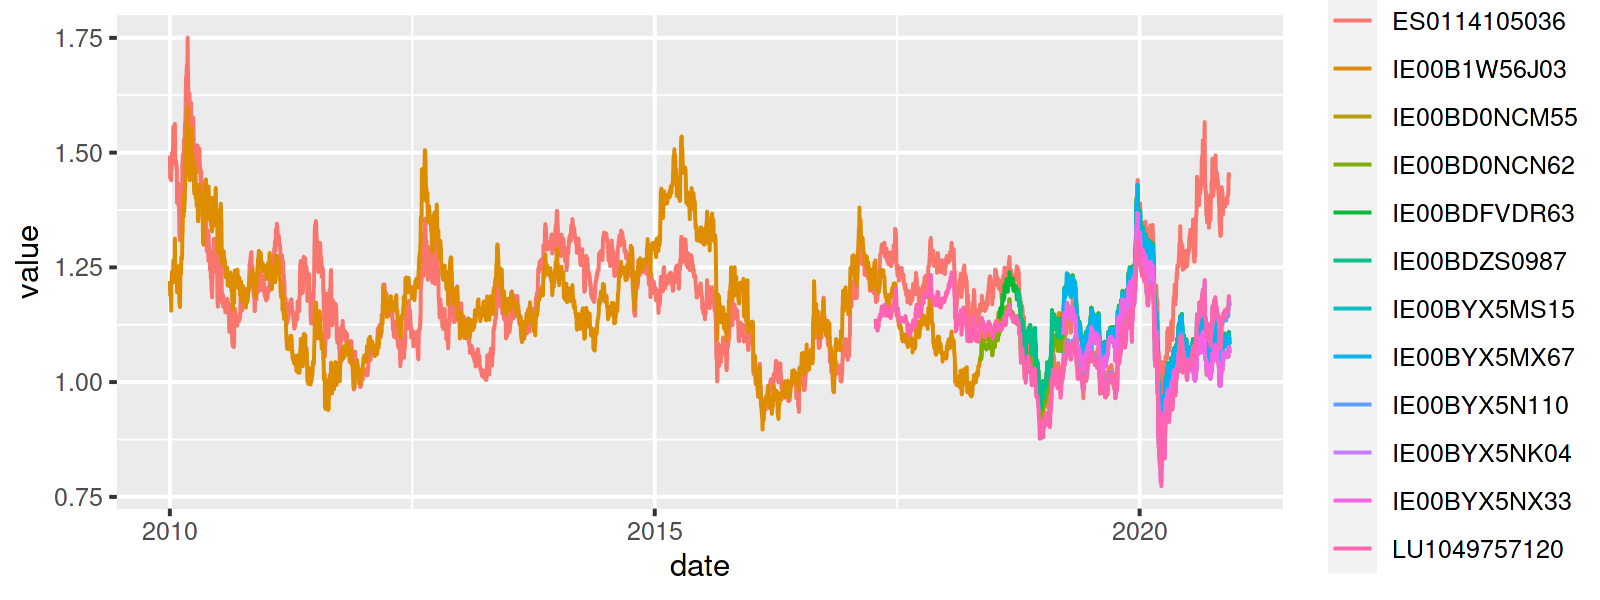

In [11]:
low_losses<-df_summary %>% filter(days_losses<100) %>% filter(geom>1.07)
low_losses
plot_funds(df_roi,funds=rownames(low_losses))

Warning message:
“Removed 21 row(s) containing missing values (geom_path).”


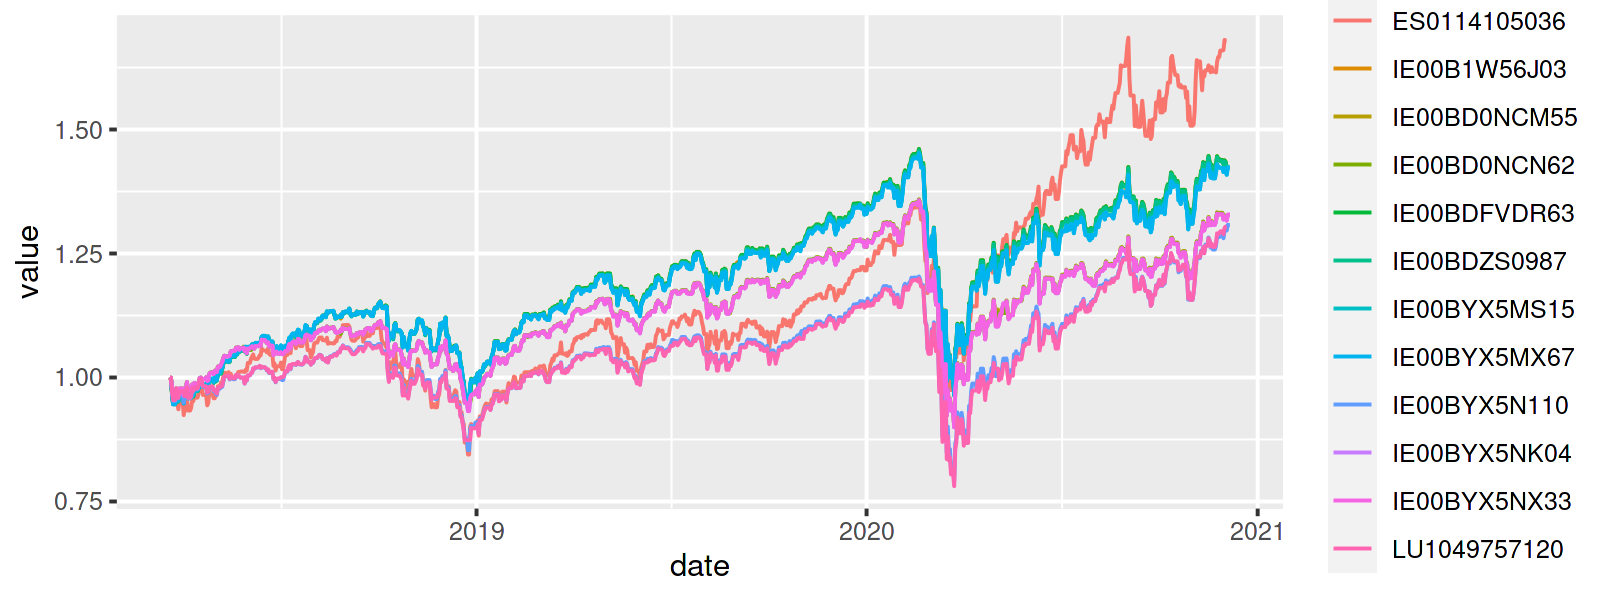

In [12]:
source('../src/R/rfunds.R')
plot_funds(df_values,funds=rownames(low_losses),start_date=max(low_losses$mindate))

We are going to look into the complete set of funds which have been working since 2016 and try to get the better combination of high ROI with low variance:

In [13]:
portfolio<- rownames(df_summary)[df_summary$mindate<'2016-01-01']
portfolio

[1] "ES0110182039" "ES0114105036" "ES0158967036" "IE0002639551" "IE0002639668"
 [6] "IE0007201266" "IE0007218849" "IE0007281425" "IE0007292083" "IE0007471695"
[11] "IE0007472115" "IE0007987690" "IE0008248795" "IE0009591805" "IE0031786142"
[16] "IE0031786696" "IE0032125126" "IE0032620787" "IE00B03HCZ61" "IE00B03HD191"
[21] "IE00B04FFJ44" "IE00B04GQQ17" "IE00B04GQR24" "IE00B04GQT48" "IE00B04GQX83"
[26] "IE00B18GC888" "IE00B1W56J03" "IE00B1W56M32" "IE00B1W56S93" "IE00B246KL88"
[31] "IE00B3B2KS38" "IE00B3D07F16" "IE00B3D07G23" "IE00B42LF923" "IE00B42W3S00"
[36] "IE00B4K9F548" "IE00B4XCK338" "IE00B5456744" "IE00B56H2V49" "IE00B62C5H76"
[41] "IE00B6RVWW34" "IE00B83YJG36" "IE00B89M2V73" "IE00BGCZ0826" "IE00BH65QK91"
[46] "IE00BH65QN23" "LU0148539108" "LU0261952682" "LU0389811372" "LU0389811885"
[51] "LU0389812347" "LU0389812933" "LU0390717543" "LU0474966750" "LU0474966834"
[56] "LU0474967055" "LU0474968020" "LU0625737910" "LU0625739619" "LU0625739700"
[61] "LU0625742753" "LU0836512615" "LU0836513266" "LU0836513423" "LU0836513696"
[66] "LU0836513852" "LU0996176912" "LU0996177134" "LU0996178884" "LU0996179007"
[71] "LU0996180864" "LU0996182308" "LU0996182563" "LU1050469367" "LU1050469441"
[76] "LU1050470373" "LU1328852659" "LU1883311653" "LU1883867761"

In [14]:
coefs <- calc_optim(na.omit(df_roi[,portfolio]), variance_importance=100)


Iter: 1 fn: -0.3678	 Pars:  0.000003325837 0.116505477240 0.034328705885 0.000000020702 0.000000091084 0.000000062241 0.000000062269 0.000000111359 0.000000111324 0.000000007900 0.000000052742 0.000000020239 0.000000033406 0.000000103597 0.000000048773 0.000000053034 0.000000054512 0.000000091094 0.000000037438 0.000000038492 0.000000259495 0.000000074025 0.000000077023 0.000000002947 0.000000003061 0.000000034020 0.000000090371 0.000000135248 0.000000065918 0.000000003224 0.000000052225 0.000000062982 0.000000064306 0.000000399314 0.000000366445 0.000000024488 0.493331914257 0.000000025472 0.000000064352 0.000000044039 0.000000133669 0.000000008255 0.000000008422 0.000000017693 0.351906183829 0.000000096322 0.000000055931 0.000000009666 0.000000032714 0.000000019069 0.000000052164 0.000000031045 0.000000057728 0.000000104795 0.000000097101 0.000000056323 0.000000041900 0.003919705767 0.000000043695 0.000000039044 0.000000028441 0.000000043643 0.000000037329 0.000000057284 0.000000001

This is the optimul ratio of coefficients for each fund:

In [15]:
coefs

ES0114105036 ES0158967036 IE00B4XCK338 IE00BH65QK91 
  0.11696787   0.03443775   0.49528112   0.35331325

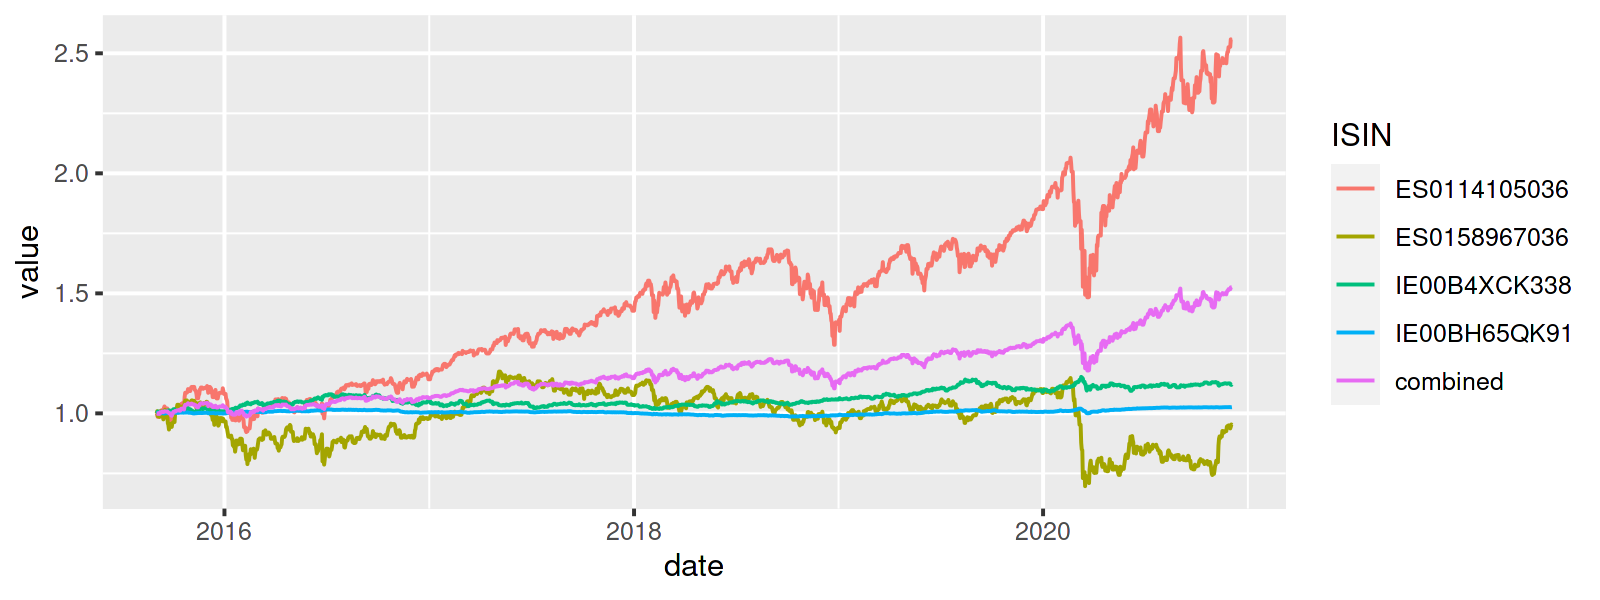

In [16]:
df_sim<-simulate_investment(df_values[,c("date",portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))

As show bellow our combined fund would have a APR of 7%. 
And would have been under 47 days of consecutive losses over a year.

In [17]:
calc_summary(df_sim,num_days = 365)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.0712842,1.0703298,0.0020742329,2015-09-02,47
ES0114105036,1.1808029,1.1742622,0.0153966564,2015-09-02,49
ES0158967036,0.9994786,0.9880188,0.0231356390,2015-09-02,352
IE00B4XCK338,1.0171884,1.0167471,0.0008999990,2015-09-02,212
IE00BH65QK91,1.0024296,1.0023569,0.0001458798,2015-09-02,427


We could remove the fund ES0158967036 which performed quite pooly but in doing so we will slighly increase or variance:

In [18]:
coefs<-coefs[c("ES0114105036","IE00B4XCK338","IE00BH65QK91")]
coefs<-coefs/sum(coefs)

,mean,geom,var,mindate,days_losses
,<dbl>,<dbl>,<dbl>,<dttm>,<int>
combined,1.073795,1.072789,0.0022034243,2015-09-02,34
ES0114105036,1.180803,1.174262,0.0153966564,2015-09-02,49
IE00B4XCK338,1.017188,1.016747,0.0008999990,2015-09-02,212
IE00BH65QK91,1.002430,1.002357,0.0001458798,2015-09-02,427


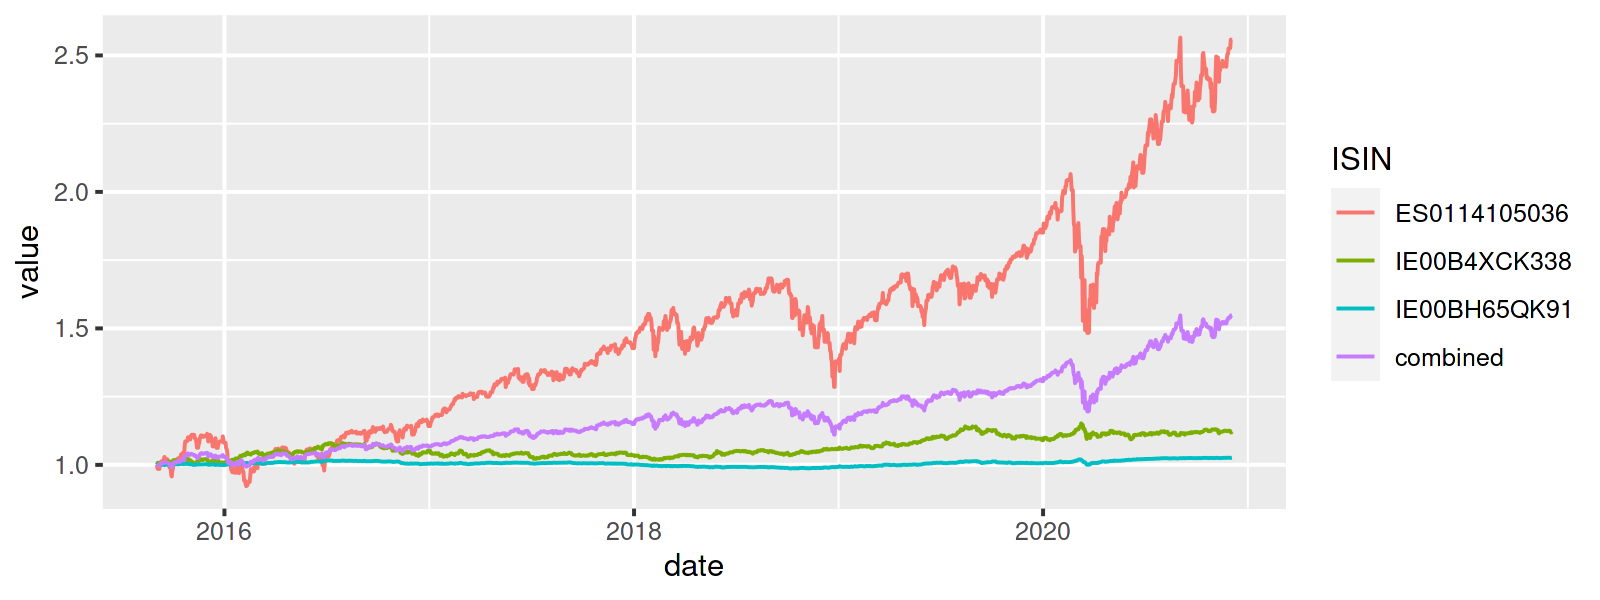

In [19]:
df_sim<-simulate_investment(df_values[,c("date",portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))
calc_summary(df_sim,num_days = 365)